<a href="https://colab.research.google.com/github/CallOfTheNight/Sussex-stuff/blob/main/NLE2023/NLEassignment2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
# Random seed number

candidateno=284246 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['since', 'their', 'film', 'debut', 'in', '1984', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

// TODO 12-11-2023

1. In order to generate a list of content words. The first things to do with the data set is to construct a bag-of-words representation for each document in the training and testing sets. It shows frequency of occurrence of each word.

- in this step. I use the `FreqDist` function to do this. This function will return the frequency of each word. I loop all the dataset to get every frequency of all the words and save it with the label in a list.

2. Then, to get the data set with meaningful words, The things have to do is remove the punctuation and stopwords, it is necessary to do a pre-processing for those words set.

- I import a model from corpus which called **stopwords**. This model contain a list with english stopwords. It get things easy because I just compare if the word in my data set are one of the element in that stopwords list. If so just remove it. Then I remove all the word which not fully build by alpha. That would remove the number and poctuation. And Change all the words in lower case.

3. The next step is figure out how often each of the word occurs in total in my dataset. It is really important for generate a words list.

4. Finally, the word list I will generate for this question will be the 10 most frequency words in this dataset. For generate it. There is a nesseary function will be use below and already be used in the lab previous:

 `most_frequent_words`:  this function should take THREE arguments: 2 frequency distributions and a natural number, k. It should order words by how much more they occur in one frequency distribution than the other.   It should then return the top k highest scoring words.

- Use this function above with different order of args to generate the list which aquire by the question.

In [5]:
# Step 1: construct a bag-of-words saving in two sets.
training_basic=[(FreqDist(wordlist),label) for (wordlist,label) in training_data]
testing_basic=[(FreqDist(wordlist),label) for (wordlist,label) in testing_data]


In [6]:
# Step 2: pre-processing.

# Import the set of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

# ---This function is copy from privious lab work.---
# This function receive a wordlist arg, change all the letter to lower case, remove all the punctuation and the word which has not represent to any reviews.
def normalise(wordlist):
    # lower case the list. In this instance, The word-bag has already lower cased.
    lowered=[word.lower() for word in wordlist]
    return [word for word in lowered if word.isalpha() and word not in stop]

# normalise all the data
# ATTENCTION: DO NOT USE THE TESTING DATA
training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]

# print and see if it's working well
print(type(training_norm),type(training_norm[0]),type(training_norm[0][0]),type(training_norm[0][1]))
print(training_norm[0])



<class 'list'> <class 'tuple'> <class 'nltk.probability.FreqDist'> <class 'str'>
(FreqDist({'lebowski': 8, 'dude': 8, 'one': 7, 'big': 5, 'coen': 4, 'films': 4, 'time': 4, 'fargo': 4, 'lot': 4, 'coens': 4, ...}), 'pos')


In [7]:
# Step 3: Calculate Total Frequency

# two blank list for store the frequency data
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

# loop every data and collect the frequency in one FreqDist object
for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

# Print and see if everything working well
pos_freq_dist

FreqDist({'film': 3699, 'one': 2113, 'movie': 1706, 'like': 1220, 'story': 885, 'good': 857, 'time': 851, 'also': 842, 'even': 819, 'well': 781, ...})

In [8]:
# Step 4: Generate the word list

# ---This function is copy from privious lab---
# Receive three args, the list of postive frequency, the list of negetive frequency, and a number k
# the important things for this function is the third args k. It means that how many word which have the most frequency would be return.
# This function will calculate the difference between two views. So that the normal word such as"one" or "from" might be removed.
# In order to get one view of most frequent word. It should be taken by the first arg and the other for the second arg.
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

# use the function above to get the two list.
pos_most = most_frequent_words(pos_freq_dist,neg_freq_dist,10)
neg_most = most_frequent_words(neg_freq_dist,pos_freq_dist,10)

# Answer here!
print("list of positive reviews training data: ",pos_most)
print("list of negitive reviews training data: ",neg_most)

list of positive reviews training data:  ['film', 'life', 'also', 'story', 'great', 'best', 'well', 'world', 'many', 'family']
list of negitive reviews training data:  ['movie', 'bad', 'plot', 'even', 'could', 'nothing', 'worst', 'script', 'supposed', 'get']


2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


// TODO 12-11-2023

In this code cell, I build a Classifier class extend `ClassifierI` class called `WordListClassifier`.

To useing this class. There are two args are needed when init a object of this class, which is `pos` and `neg`. They are the word list for training this classifier.

After init the object, Use the function `classify` or `classify_many` to test data. these two function are extends from super class. I only rewrited `classify` function.

In classify process, This classifier useing a value called `score` to evaluate which class does the test document belong to.
when the word in test document appear in the `pos` or `neg` words list. The score will add or minus at the same time. At the end, this function will  a string "pos" or "neg" depends on the score is positive or negitive.

In the end of this cell, I make a simple test for this class.

In [12]:
from nltk.classify.api import ClassifierI
import random

# My own word list classifier implements the interface ClassifierI
class WordListClassifier(ClassifierI):

# init this class with the given word list.
# In this case, The word list is the one I generate above.
    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

# This function receive a FreqDist object as a arg to evaluate the score
# for each word appear in the word list, the score will change depends on it's label
# It's return one of two value:"P" for positive review or "N" for the negitive review.
# The return depends on the score this doc get. And if the score is zero, The classifer
# would randomly select a value.
    def classify(self, doc):

        score = 0

        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value

        if score < 0:
          label = "neg"
        elif score == 0:
          label = random.choice(["neg","pos"])
        else:
          label = "pos"
        return label

# define for implements the interface
    def labels(self):
        return ("pos", "neg")


wordListClassifier = WordListClassifier(pos_most, neg_most)
# wordListClassifier.classify(FreqDist("This movie is so bad".split()))
wordListClassifier.classify_many(doc for doc,label in testing_norm)


['neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

// TODO

In this cell, I get a function called `classifier_evaluate` and a class called `ConfusionMatrix` for evaluate the classifier porformance. And all of them are copy from privious lab work. I just make a slightly change.

In the first cell. `classifier_evaluate` function receive two args `cls` and `test_data`.
`cls`: the classifier object which you want to evaluate the porformance.
`test_data`: the test data which will be use when evaluation.

In this function, It just simple compare the the label output by the classifier and the real label. And get the rate of it. that is what we called: accuracy.

## Answer for question B:

It is not a good idea to evaluate the classifier in terms of its  accuracy. Because in the case of the test data we give for evaluate the accuracy are not half positive half negitive, A really bad classifier who just making every label in the same word might get a higher socre than it should be.

In [13]:
# Calculate the accuracy
def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label

    returns: float point number which is the accuracy of the classifier on the test data provided
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1

    # print("Acc",acc,"length",(len(test_data)))
    return acc / (len(test_data))

# Run this function
score = classifier_evaluate(WordListClassifier(pos_most,neg_most),testing_norm)
print("Accuracy: ", round(score,5))

Accuracy:  0.64333


// TODO

In this cell, we get a class for the precision, recall and F1.

In order to evaluate it. we need the label list of a classifier output and the real label.

Finally, just call each of the required functions.

In the end, a simple test for this class is making.

In [14]:
# Class for calculate the precision, recall and F1 score
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p=0
        p = self.TP / (self.TP + self.FP)

        return p

    def recall(self):
        r=0
        r = self.TP / (self.TP + self.FN)

        return r

    def f1(self):
        f1=0
        p=self.precision()
        r=self.recall()
        f1=(p * r * 2) / (p + r)
        return f1

# Test for this class
docs,labels = zip(*testing_norm)
cfm = ConfusionMatrix(WordListClassifier(pos_most,neg_most).classify_many(docs),labels)
# print(cfm.TP)
# print(cfm.FP)
# print(cfm.TN)
# print(cfm.FN)

print("Precision: ", round(cfm.precision(),5))
print("Recall: ", round(cfm.recall(),5))
print("F1: ", round(cfm.f1(),5))

Precision:  0.60574
Recall:  0.77333
F1:  0.67936


4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

// TODO

Naive Bayes classifier is not a very difficult classifier, Even most of the code was implemented in previous labs. One difference is that the classifier is trained at initialization.

In addition, based on the characteristics of naive Bayes, we have three problems to solve, the first is some data that only appears in the test set but not in the training set. These data are not recognized by the classifier. So they're just "redundant." In the code below, I use the "_set_known_vocabulary" function to move all words that meet the above criteria out of the classification process.

In addition, for some words with a frequency of 0, the classifier cannot recognize them properly, which will result in a multiplier of 0 when calculating the probability, resulting in the entire result being 0. We used a method called "Laplacian smoothing" or "+1 smoothing "to solve this problem, specifically, for each word, add 1 to its frequency. This eliminates all words with zero occurrences. To make the classifier work properly.

The final problem is the loss of precision. When the classifier needs to operate on too many elements, the probability of each element will become small, and the classifier needs to multiply all the small probabilities, which will lead to a very small value, in the computer, when a value is small to a certain extent may lose precision, which will lead to classification errors. Therefore, when we calculate the probability, we add a log to both sides of the equation. This avoids the underflow problem. And the result is the same as the theoretical result without the log.

In the end, There is a simple test codes for my NBClassifier.

In [16]:
# for the log function.
import math

# Naive Bayes Classifier
class NBClassifier(ClassifierI):

  def __init__(self,training_data):
    # pass
    self.td = training_data
    # known = self._set_known_vocabulary(self.td)
    # priors = self._set_priors(self.td)
    # c_probs = self._set_cond_probs(self.td)

  def _set_known_vocabulary(self,training_data):
    known=set()
    for doc,label in training_data:
        for word in list(doc.keys()):
          known.add(word)
    return known


  def _set_priors(self,training_data):
    priors={}

    for (doc,label) in training_data:
        priors[label]=priors.get(label,0)+1

    total=sum(priors.values())

    for key,value in priors.items():
        priors[key]=value/total

    return priors

  def _set_cond_probs(self,training_data):
    conds={}
    for(doc,label) in training_data:
        classcond=conds.get(label,{})
        for word,value in doc.items():
            classcond[word]=classcond.get(word,0)+value

        conds[label]=classcond

    vocab=self._set_known_vocabulary(training_data)
    for label, classcond in conds.items():
        for word in vocab:

            classcond[word]=classcond.get(word,0)+1
        conds[label]=classcond

    for label,dist in conds.items():
        total=sum(dist.values())
        conds[label]={key:value/total for (key,value) in dist.items()}

    return conds


  # def train(self,training_data):
  #     self._set_known_vocabulary(training_data)
  #     self._set_priors(training_data)
  #     self._set_cond_probs(training_data)

  def classify(self,doc):

    known = self._set_known_vocabulary(self.td)
    priors = self._set_priors(self.td)
    c_probs = self._set_cond_probs(self.td)

    doc_probs={key:math.log(value) for (key,value) in priors.items()}

    for word in doc.keys():
        # print(word)
        if word in known:
          doc_probs={classlabel:sofar+math.log(c_probs[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}
          # print(doc_probs)
    highprob=max(doc_probs.values())
    # print(doc_probs.values(),doc_probs.keys())
    classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
    # print(classes)
    return random.choice(classes)

nbdemo = NBClassifier(training_norm)
sent = "movie great bad terrible"
doc = FreqDist(sent.split())
nbdemo.classify(doc)


'neg'

Here I just invoke the code already implemented in the above problem to complete the problem. I generate four metrics for both classifiers to evaluate their performance. It is obvious that naive Bayes classifier perform slightly better than words list classifier.

However, the correct choice of classifier still depends on different situations. For example, in the case of performance shortage, the hardware computing power of naive Bayes classifier is much larger than that of word list classifier. This can be perceived simply by calculating the rating speed of the two classifiers from the colab.

In [17]:

docs,labels = zip(*testing_norm)
cfm = ConfusionMatrix(WordListClassifier(pos_most,neg_most).classify_many(docs[:50]),labels)

print("My word list classifier:")
print("Acc: ",classifier_evaluate(wordListClassifier,testing_norm[:50]))
print("Precision: ", round(cfm.precision(),5))
print("Recall: ", round(cfm.recall(),5))
print("F1: ", round(cfm.f1(),5))


cfm = ConfusionMatrix(NBClassifier(training_norm).classify_many(docs[:50]),labels)
print("=" * 20)
print("NB classifier: ")
print("Acc: ",classifier_evaluate(nbdemo,testing_norm[:50]))
print("Precision: ", round(cfm.precision(),5))
print("Recall: ", round(cfm.recall(),5))
print("F1: ", round(cfm.f1(),5))

My word list classifier:
Acc:  0.68
Precision:  1.0
Recall:  0.7
F1:  0.82353
NB classifier: 
Acc:  0.78
Precision:  1.0
Recall:  0.78
F1:  0.8764


5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


My experiment is very simple, I use a loop to increase the number of words in the word list classifier, where the words will increase from 10 to 1000 with 50 steps. With each addition, its performance is evaluated. The results are stored in a dictionary and displayed with images.

According to my experimental results, for word list classifiers, when the number of words increases from very few (about 10) to around 100-150 (for the current training set and test set size). The performance of the classifier is gradually increasing. Then, as the number of words continued to increase, there was a significant fluctuation in performance. I think this is due to overfitting. After about 600+ words, the performance of the classifier starts to flatten out and remains at a stable value.

{10: {'Acc:': 0.6366666666666667}, 60: {'Acc:': 0.6633333333333333}, 110: {'Acc:': 0.6866666666666666}, 160: {'Acc:': 0.6616666666666666}, 210: {'Acc:': 0.6816666666666666}, 260: {'Acc:': 0.6616666666666666}, 310: {'Acc:': 0.6683333333333333}, 360: {'Acc:': 0.6616666666666666}, 410: {'Acc:': 0.6483333333333333}, 460: {'Acc:': 0.6616666666666666}, 510: {'Acc:': 0.655}, 560: {'Acc:': 0.65}, 610: {'Acc:': 0.6633333333333333}, 660: {'Acc:': 0.67}, 710: {'Acc:': 0.6633333333333333}, 760: {'Acc:': 0.6633333333333333}, 810: {'Acc:': 0.6566666666666666}, 860: {'Acc:': 0.65}, 910: {'Acc:': 0.6566666666666666}, 960: {'Acc:': 0.655}}


Text(0.5, 0, 'Sample Size')

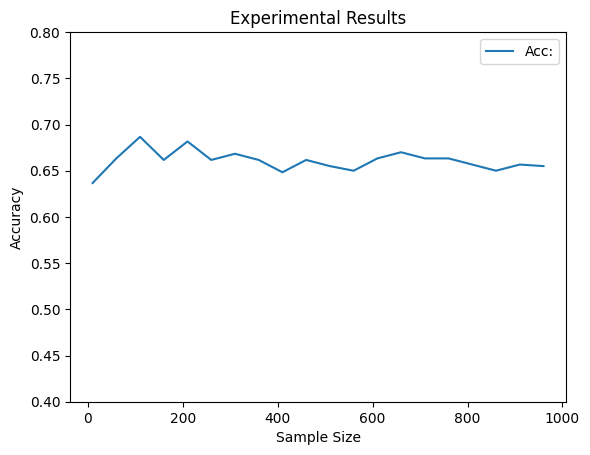

In [20]:
# model for image
import pandas as pd

# dictionary for saving evaluate score data
acc = {}

for topk in range(10,1001,50):


  # generate a word list classifier object with different size of words lists.
  pos_most = most_frequent_words(pos_freq_dist,neg_freq_dist,topk)
  neg_most = most_frequent_words(neg_freq_dist,pos_freq_dist,topk)
  testWordListClassifier = WordListClassifier(pos_most,neg_most)

  temp = classifier_evaluate(testWordListClassifier,testing_norm)
  acc[topk] = {"Acc:":temp}

# print(acc)

# =======================================
# Draw image
df=pd.DataFrame(acc)
df=df.transpose()

ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_ybound(0.4,0.8)
ax.set_xlabel("Sample Size")

In [21]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/NLEassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 327
